In [8]:
#%pip install ultralytics imgaug matplotlib torch

In [9]:
#%pip install opencv-python-headless  

In [10]:
#!wget -P ./data -q "https://filedn.eu/lwnF6OGJjyNyTUCGJUbsnVp/public_data/project_nvd/Labeled%20Frames%20(YOLO%20Format).zip"

In [13]:
#!unzip -q ./data/nvd_dataset.zip -d ./data/

In [14]:
#from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
import random
import torch
import imgaug.augmenters as iaa
from IPython.display import Image

In [20]:
!nvidia-smi

Wed May 15 22:34:20 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:22:00.0 Off |                  N/A |
| 32%   27C    P8             21W /  250W |    1236MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
# Check PyTorch GPU availability
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Is Available: {torch.cuda.is_available()}")
else:
    print("GPU is not available.")

GPU Name: NVIDIA GeForce RTX 2080 Ti
GPU Is Available: True


In [24]:
#!wget https://github.com/WongKinYiu/yolov9/archive/refs/heads/main.zip

In [64]:
#!wget -P ./data/models https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

In [25]:
#!unzip -q yolov9-main.zip

In [28]:
#!pip install -r ./yolov9-main/requirements.txt

In [69]:
image_directory = "./yolov9-main/data/images"

def run_yolov9_ft_detection(image_path, model_path):  
    command = [  
        'python', './yolov9-main/detect.py',  
        '--img', '1280',  
        '--conf', '0.1',  
        '--weights', model_path,  
        '--source', image_path  
    ]  
  
    result = subprocess.run(command, capture_output=True, text=True)  
    print(result.stdout)  
    if result.stderr:  
        print(result.stderr)  
  
  
# List all files in the directory  
all_files = os.listdir(image_directory)  
  
# Filter out only image files (e.g., .png, .jpg)  
image_files = [file for file in all_files if file.endswith('.png')]  

In [65]:
!python ./yolov9-main/detect.py --weights ./data/models/yolov9e.pt --source "./yolov9-main/data/images/2022-12-04 Bjenberg 02-frame2651.png" --device 0

detect: weights=['./data/models/yolov9e.pt'], source=./yolov9-main/data/images/2022-12-04 Bjenberg 02-frame2651.png, data=yolov9-main/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9-main/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 2024-5-16 Python-3.11.0rc1 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)

Fusing layers... 
Model summary: 839 layers, 68669632 parameters, 0 gradients, 241.4 GFLOPs
image 1/1 /home/susmoh3/yolov9-main/data/images/2022-12-04 Bjenberg 02-frame2651.png: 384x640 (no detections), 115.0ms
Speed: 0.5ms pre-process, 115.0ms inference, 29.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov9-main/runs/detect/exp24


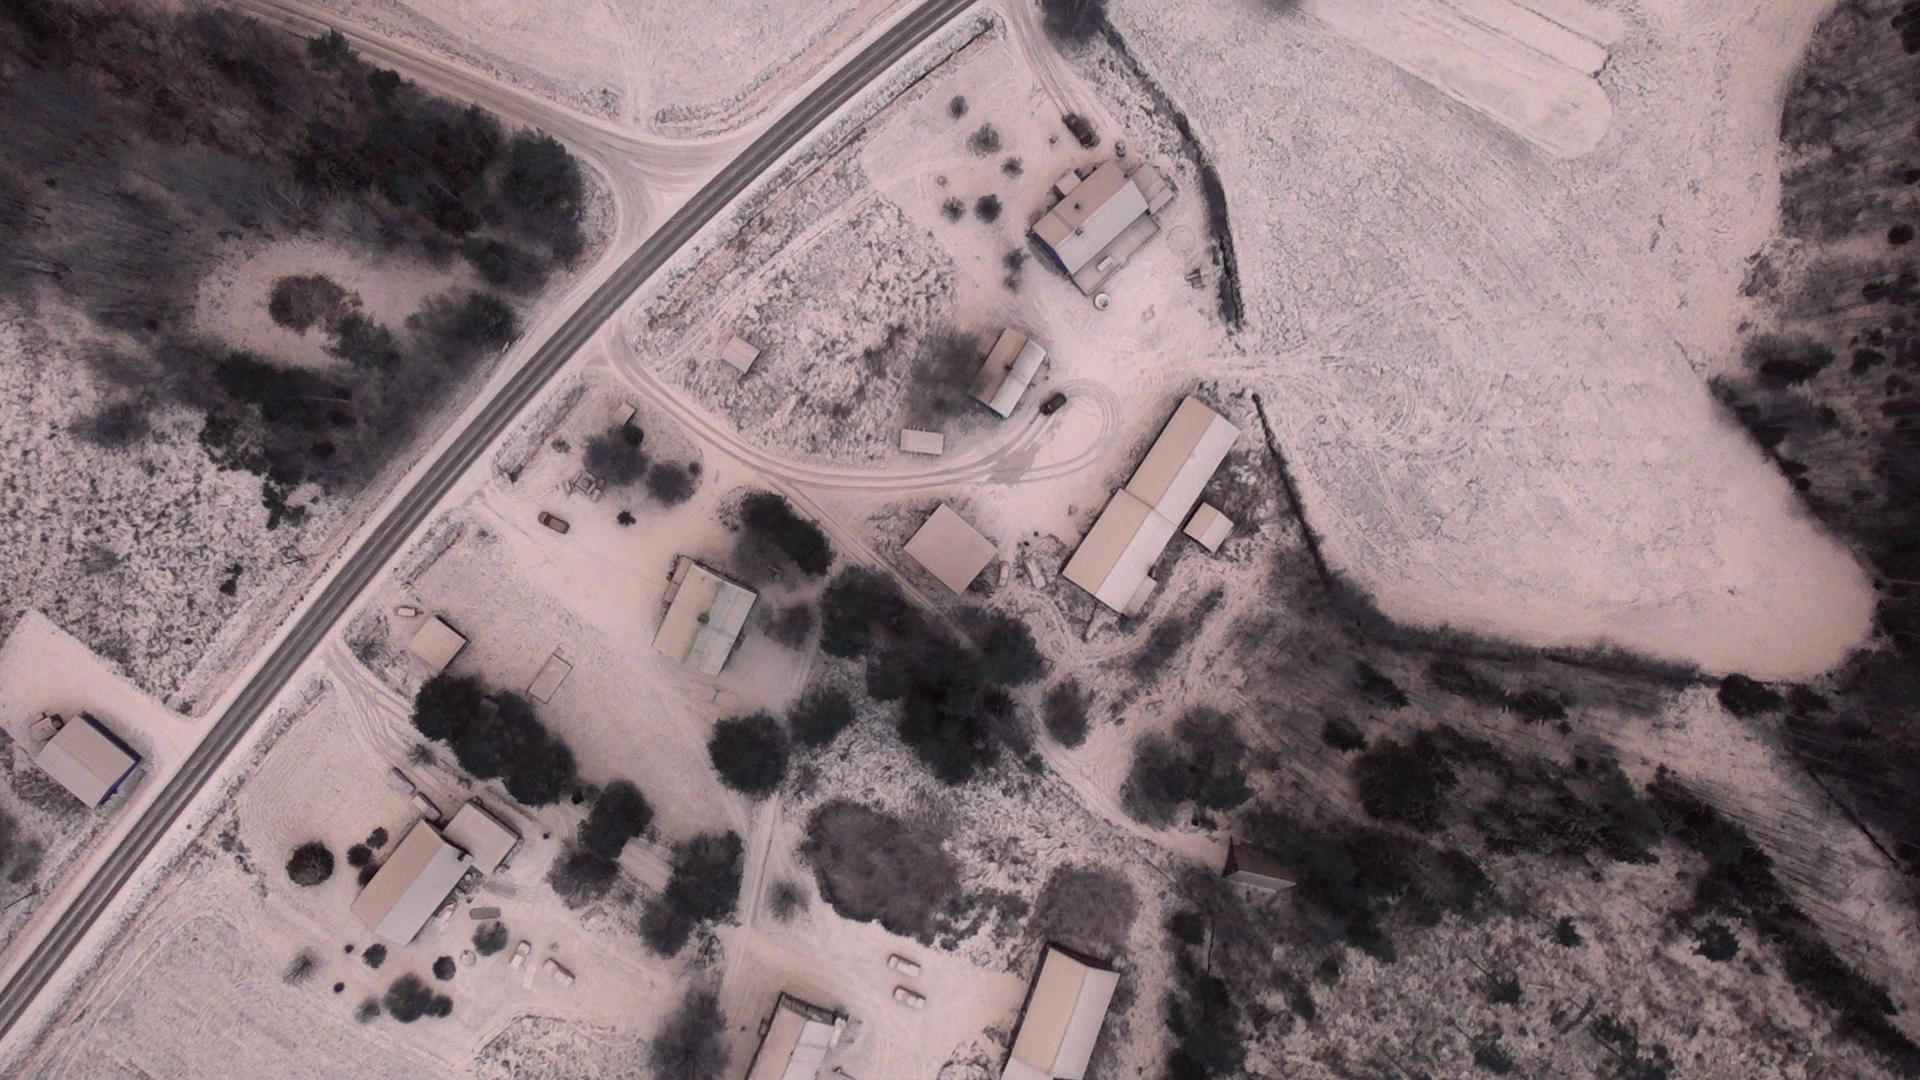

In [66]:
Image(filename=f"./yolov9-main/data/images/2022-12-04 Bjenberg 02-frame2651.png", width=1000)     

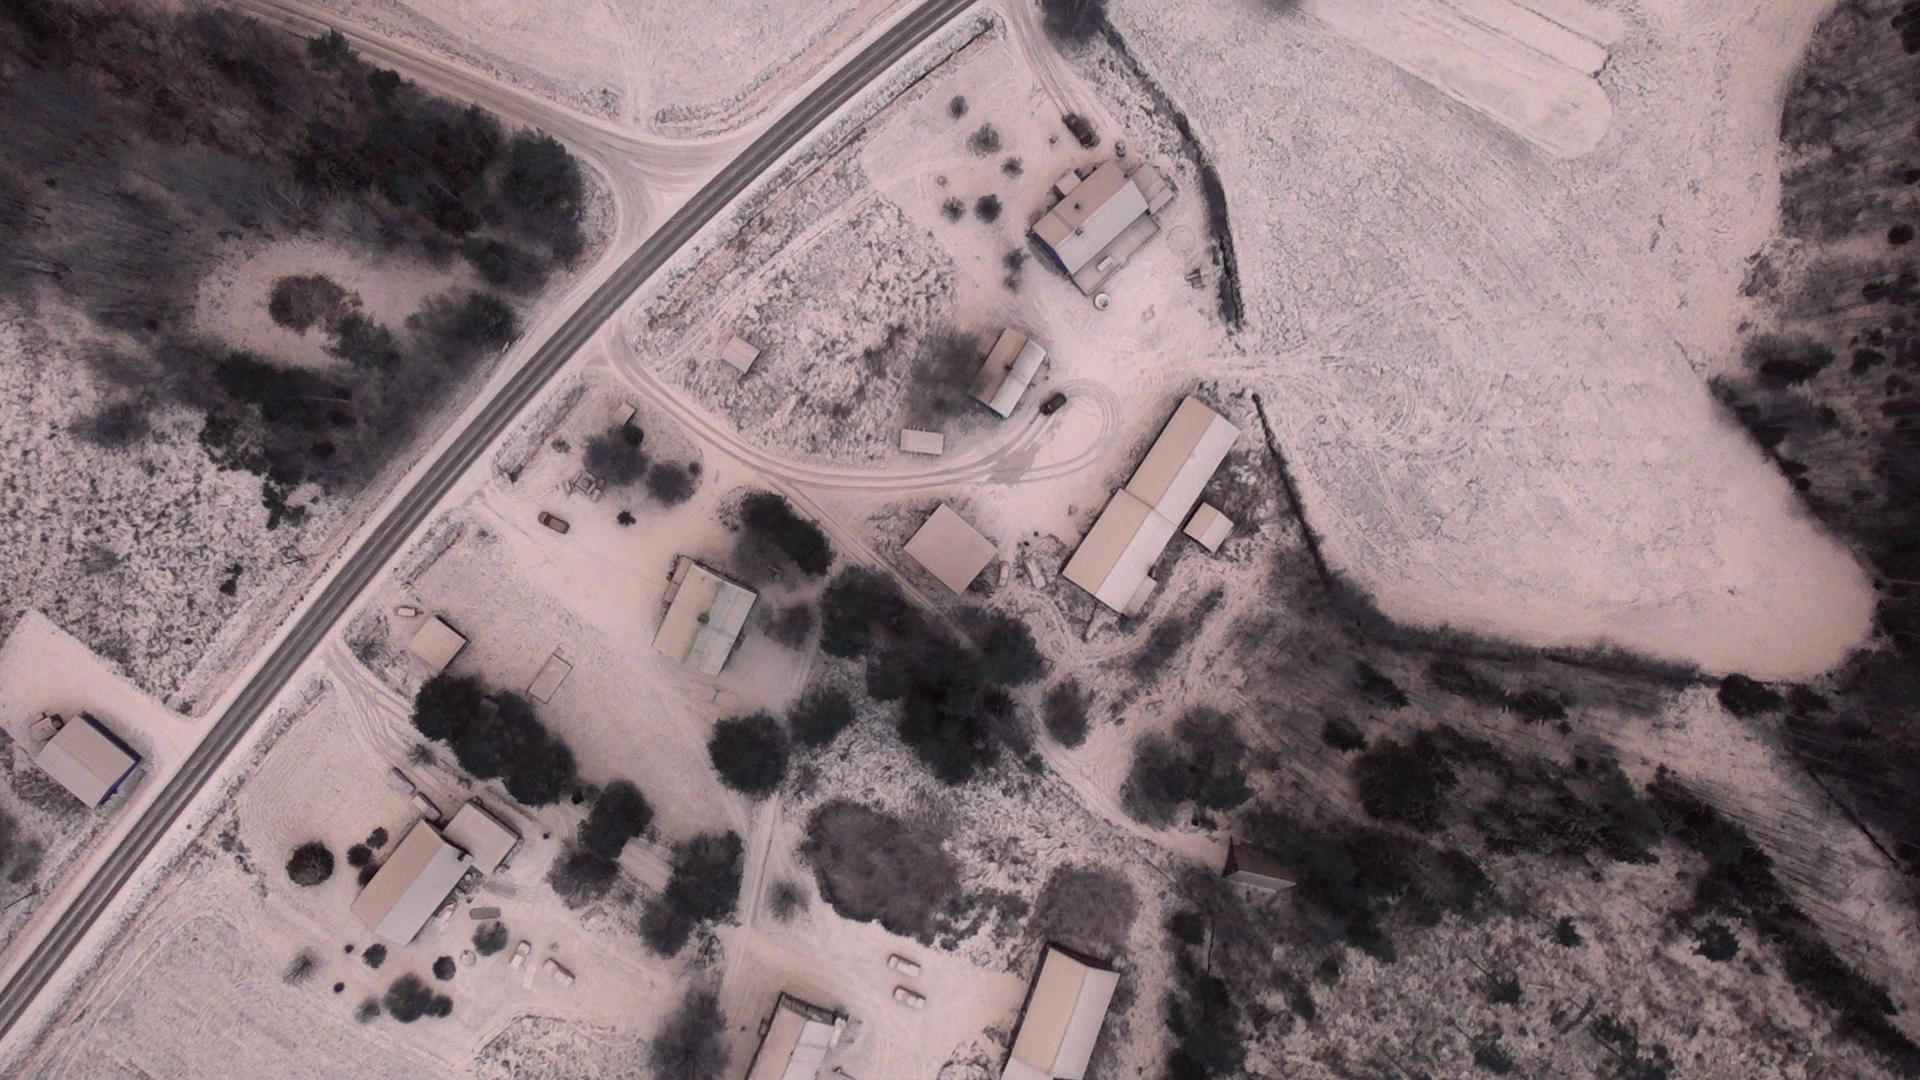

In [67]:
Image(filename=f"./yolov9-main/runs/detect/exp24/2022-12-04 Bjenberg 02-frame2651.png", width=1000) 

In [36]:
!python ./yolov9-main/train_dual.py --workers 8 --batch 4  --img 640 --epochs 10 --data ./yolov9-main/data.yaml --weights ./data/models/yolov9e.pt --device 0 --cfg ./yolov9-main/models/detect/yolov9_custom.yaml --hyp ./yolov9-main/data/hyps/hyp.scratch-high.yaml
     

train_dual: weights=./data/models/yolov9e.pt, cfg=./yolov9-main/models/detect/yolov9_custom.yaml, data=./yolov9-main/data.yaml, hyp=./yolov9-main/data/hyps/hyp.scratch-high.yaml, epochs=10, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov9-main/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=0, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO 🚀 2024-4-20 Python-3.11.0rc1 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls

In [46]:
!python ./yolov9-main/detect.py --img 1280 --conf 0.1 --weights ./yolov9-main/runs/train/exp6/weights/best.pt --source "./yolov9-main/data/images/2022-12-02 Asjo 01_stabilized-frame0080.png"    

detect: weights=['./yolov9-main/runs/train/exp6/weights/best.pt'], source=./yolov9-main/data/images/2022-12-02 Asjo 01_stabilized-frame0080.png, data=yolov9-main/data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9-main/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 2024-5-16 Python-3.11.0rc1 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)

Fusing layers... 
yolov9_custom summary: 580 layers, 60495910 parameters, 0 gradients, 263.9 GFLOPs
image 1/1 /home/susmoh3/yolov9-main/data/images/2022-12-02 Asjo 01_stabilized-frame0080.png: 736x1280 (no detections), 103.7ms
Speed: 0.8ms pre-process, 103.7ms inference, 70.0ms NMS per image at shape (1, 3, 1280, 1280)
Results saved t

In [57]:
#downgrade to pillow 9.5 to fix AttributeError: 'FreeTypeFont' object has no attribute 'getsize'
#!pip uninstall -y pillow
#!pip install pillow==9.5
#!pip show Pillow

Name: Pillow
Version: 9.5.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Jeffrey A. Clark (Alex)
Author-email: aclark@aclark.net
License: HPND
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: imageio, imgaug, matplotlib, scikit-image, torchvision, ultralytics


In [51]:

n = 5  # Number of images to randomly select  
  
# Randomly select n images  
selected_images = random.sample(image_files, n)  
  
# Full path for selected images  
selected_image_paths = [os.path.join(image_directory, image) for image in selected_images]  

model_path = "yolov9-main/runs/train/exp6/weights/best.pt"

# Iterate over the selected images and run detection  
for image_path in selected_image_paths:  
    run_yolov9_ft_detection(image_path, model_path) 


detect: weights=['./yolov9-main/runs/train/exp6/weights/best.pt'], source=./yolov9-main/data/images/2022-12-04 Bjenberg 02-frame4872.png, data=yolov9-main/data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9-main/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 2024-5-16 Python-3.11.0rc1 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)

Fusing layers... 
yolov9_custom summary: 580 layers, 60495910 parameters, 0 gradients, 263.9 GFLOPs
image 1/1 /home/susmoh3/yolov9-main/data/images/2022-12-04 Bjenberg 02-frame4872.png: 736x1280 3 Cars, 107.5ms
Speed: 0.9ms pre-process, 107.5ms inference, 149.0ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to yolov9-main/runs/de

In [58]:
!python ./yolov9-main/train_dual.py --workers 12 --batch 6  --img 640 --epochs 50 --data ./yolov9-main/data.yaml --weights ./data/models/yolov9e.pt --device 0 --cfg ./yolov9-main/models/detect/yolov9_custom.yaml --hyp ./yolov9-main/data/hyps/hyp.scratch-high.yaml

train_dual: weights=./data/models/yolov9e.pt, cfg=./yolov9-main/models/detect/yolov9_custom.yaml, data=./yolov9-main/data.yaml, hyp=./yolov9-main/data/hyps/hyp.scratch-high.yaml, epochs=50, batch_size=6, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=12, project=yolov9-main/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=0, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO 🚀 2024-5-16 Python-3.11.0rc1 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cl

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [71]:
n = 5  # Number of images to randomly select  
  
# Randomly select n images  
selected_images = random.sample(image_files, n)  
  
# Full path for selected images  
selected_image_paths = [os.path.join(image_directory, image) for image in selected_images]  

model_path = "yolov9-main/runs/train/exp7/weights/best.pt"

# Iterate over the selected images and run detection  
for image_path in selected_image_paths:  
    run_yolov9_ft_detection(image_path, model_path)  


detect: weights=['yolov9-main/runs/train/exp7/weights/best.pt'], source=./yolov9-main/data/images/2022-12-03 Nyland 01_stabilized-frame0989.png, data=yolov9-main/data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9-main/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 2024-5-16 Python-3.11.0rc1 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)

Fusing layers... 
yolov9_custom summary: 580 layers, 60495910 parameters, 0 gradients, 263.9 GFLOPs
image 1/1 /home/susmoh3/yolov9-main/data/images/2022-12-03 Nyland 01_stabilized-frame0989.png: 736x1280 6 Cars, 101.1ms
Speed: 0.8ms pre-process, 101.1ms inference, 130.4ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to yol